### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

caminho_base = "./base-de-dados-challenge-1/"  # Note a barra normal (funciona em todos)
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar as tabela (DataFrames) de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)  # Usando os.path.join()
    df_loja = pd.read_csv(caminho_completo)
    lista_tabelas.append(df_loja)

# Concatena toda as tabelas na lista em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# mostra as 4 primeiras linhas da tabela concatenada com as informações de todas as 4 lojas
lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Faturamento

### 1.1 - Faturamento total por loja

In [2]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    # Extrai o nome da loja do nome do arquivo
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja  # Cria a coluna 'Loja'
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)

# Calcula o faturamento por loja
faturamento_por_loja = lojas.groupby('Loja')['Preço'].sum().reset_index()

# Formata o faturamento para exibição (CORREÇÃO AQUI)
def formatar_moeda_br(valor):
    valor_formatado = f'R$ {valor:,.2f}'
    valor_formatado = valor_formatado.replace('.', '#')  # Temporariamente substitui o ponto
    valor_formatado = valor_formatado.replace(',', '.')  # Substitui a vírgula
    valor_formatado = valor_formatado.replace('#', ',')  # Restaura o ponto
    return valor_formatado

faturamento_por_loja['Faturamento'] = faturamento_por_loja['Preço'].apply(formatar_moeda_br)

# Remove a coluna 'Preço'
faturamento_por_loja = faturamento_por_loja.drop(columns=['Preço'])

# Exibe o resultado
print("Faturamento por Loja:")
print(faturamento_por_loja.to_string(index=False))

Faturamento por Loja:
  Loja     Faturamento
Loja_1 R$ 1.534.509,12
Loja_2 R$ 1.488.459,06
Loja_3 R$ 1.464.025,03
Loja_4 R$ 1.384.497,58


### 1.2 Faturamento - Gráfico do faturamento total por loja

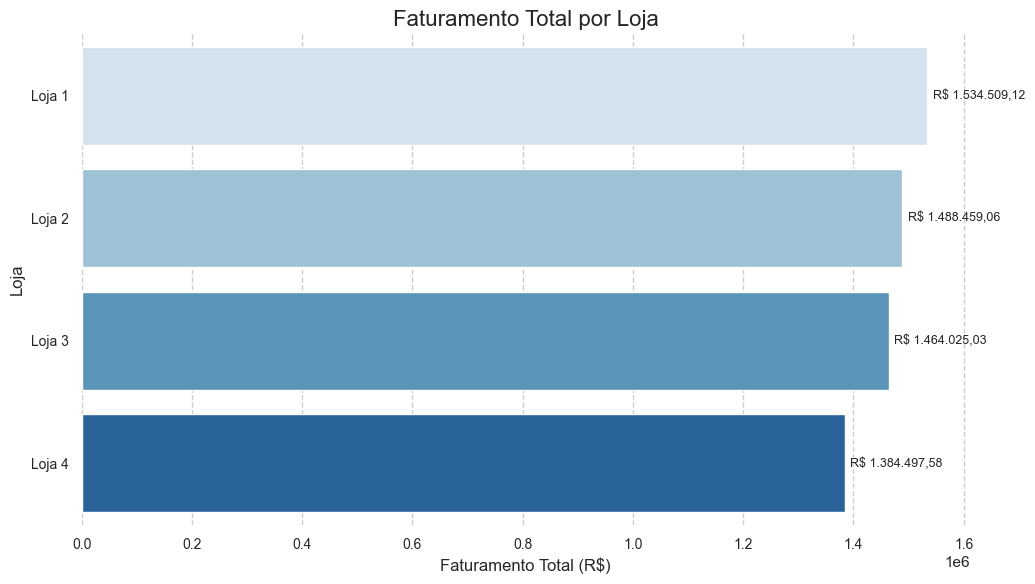

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Seu código para calcular o faturamento (já fornecido anteriormente)
caminho_base = './base-de-dados-challenge-1/'
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
resultados = [pd.read_csv(caminho_base + arquivo) for arquivo in arquivos_lojas]
nomes_lojas = [arquivo.split('.')[0].replace('_', ' ').title() for arquivo in arquivos_lojas]
faturamentos = [df['Preço'].sum() for df in resultados]
dados_resumo = {'Loja': nomes_lojas, 'Faturamento Total': faturamentos}
df_resumo = pd.DataFrame(dados_resumo)

def formatar_moeda_br(valor):
    return f'R$ {valor:_.2f}'.replace('.', ',').replace('_', '.')

df_resumo['Faturamento Total Formatado'] = df_resumo['Faturamento Total'].apply(formatar_moeda_br)
df_resumo['Loja'] = df_resumo['Loja'].astype(str)

# Gráfico de barras horizontais com Seaborn e paleta "Set2" (CORREÇÃO DO AVISO)
sns.set_theme(style="whitegrid")

# Definindo o estilo do gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais
sns.barplot(y='Loja', x='Faturamento Total', data=df_resumo, palette="Blues", hue='Loja', legend=False)

# Formata os valores do eixo x para moeda
plt.xlabel('Faturamento Total (R$)', fontsize=12)
plt.ylabel('Loja', fontsize=12)
plt.title('Faturamento Total por Loja', fontsize=16)

# Formata os ticks do eixo x para moeda
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(bottom=True, left=True)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

# Adiciona os valores ao lado das barras
for i, v in enumerate(df_resumo['Faturamento Total']):
    plt.text(v + 10000, i, f'R$ {v:_.2f}'.replace('.', ',').replace('_', '.'), va='center', fontsize=9)

plt.show()

# 2. Vendas por Categoria

### 2.1 - Faturamento por categoria de produto

In [ ]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    lista_tabelas.append(df_loja)

df_consolidado = pd.concat(lista_tabelas, ignore_index=True)

# Calcula o faturamento por categoria
faturamento_por_categoria = df_consolidado.groupby('Categoria do Produto')['Preço'].sum().reset_index()

# 2. Formatar as colunas de valor como moeda
# Formata o faturamento para exibição
def formatar_moeda_br(valor):
    valor_formatado = f'R$ {valor:,.2f}'
    valor_formatado = valor_formatado.replace('.', '#')  # Temporariamente substitui o ponto
    valor_formatado = valor_formatado.replace(',', '.')  # Substitui a vírgula
    valor_formatado = valor_formatado.replace('#', ',')  # Restaura o ponto
    return valor_formatado

# Ordena o DataFrame pelo faturamento (coluna 'Preço') em ordem decrescente
faturamento_por_categoria_ordenado = faturamento_por_categoria.sort_values(by='Preço', ascending=False)

# Aplica a formatação da moeda na coluna 'Faturamento'
faturamento_por_categoria_ordenado['Faturamento'] = faturamento_por_categoria_ordenado['Preço'].apply(formatar_moeda_br)

# Remove a coluna 'Preço'
faturamento_por_categoria_ordenado = faturamento_por_categoria_ordenado.drop(columns=['Preço'])

# Exibe o resultado ordenado
print("Faturamento por Categoria (do maior para o menor):")
print(faturamento_por_categoria_ordenado.to_string(index=False))

Faturamento por Categoria (do maior para o menor):
 Categoria do Produto     Faturamento
          eletronicos R$ 2.214.099,72
     eletrodomesticos R$ 1.766.337,03
               moveis R$ 1.010.214,00
instrumentos musicais   R$ 465.029,67
      esporte e lazer   R$ 190.635,39
           brinquedos    R$ 98.140,86
utilidades domesticas    R$ 76.773,38
               livros    R$ 50.260,74


### 2.2 - Vendas por categoria - Gráfico do faturamento por categoria de produto

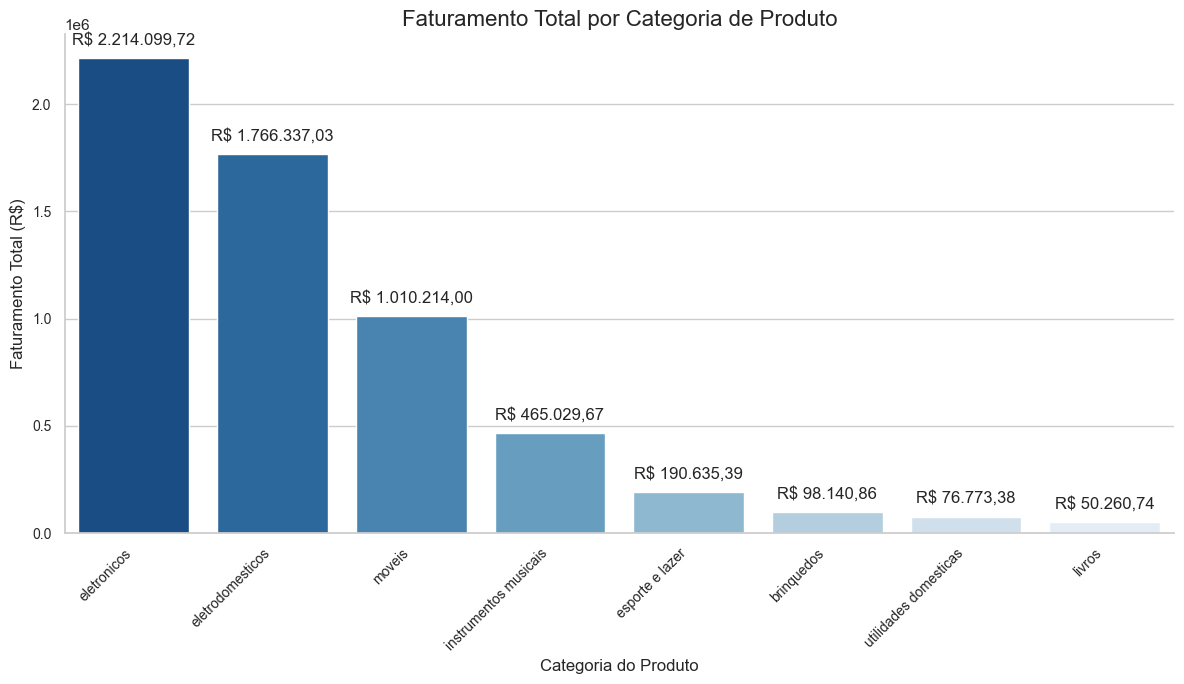

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    lista_tabelas.append(df_loja)

df_consolidado = pd.concat(lista_tabelas, ignore_index=True)

# Calcular o faturamento total por categoria
venda_por_categoria = df_consolidado.groupby('Categoria do Produto')['Preço'].sum().reset_index()
venda_por_categoria.columns = ['Categoria do Produto', 'Faturamento Total']

# Ordenando o DataFrame pelo faturamento (do maior para o menor)
df_ordenado_seaborn = venda_por_categoria.sort_values(by='Faturamento Total', ascending=False)

# Criar o estilo do gráfico
sns.set_theme(style="whitegrid")

# Tamanho do gráfico
plt.figure(figsize=(12, 7))

# Definir a paleta de cores com base no número de categorias
num_categorias = len(df_ordenado_seaborn)
cores = sns.color_palette("Blues_r", n_colors=num_categorias)

# Criar o gráfico de barras com a paleta ordenada
sns.barplot(x='Categoria do Produto', y='Faturamento Total', data=df_ordenado_seaborn, palette=cores, hue='Categoria do Produto', legend=False)

# Adicionar os valores acima das barras (usando plt.text para mais controle)
for i, v in enumerate(df_ordenado_seaborn['Faturamento Total']):
    plt.text(i, v + 50000, f'R$ {v:_.2f}'.replace('.', ',').replace('_', '.'), ha='center', va='bottom')

# Adiciona formatação de moeda ao eixo y
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.title('Faturamento Total por Categoria de Produto', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()

# Exibe o gráfico
plt.show()